## Perceptron Implementation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Generation of Data

In [88]:
X,Y = make_blobs(n_samples = 500, n_features =  2 , centers = 2,random_state =12)
print(X.shape)

(500, 2)


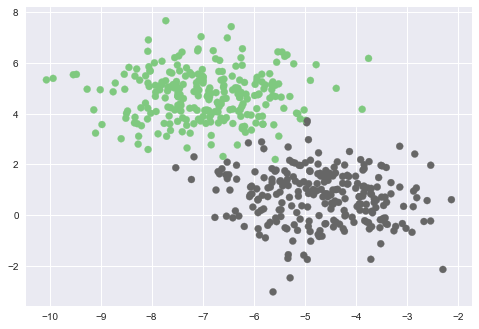

In [89]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y , cmap= plt.cm.Accent)

### Defining Model and Helper Functions 

In [90]:
def sigmoid(z):
    return (1.00/(1+ np.exp(-z)))

### Implement Perceptron Learning Algorithm
- Learn Weights
- Reduce the loss
- Make Predictions

In [91]:
## Define Prediction Function
def predict(x,weights):
    temp = x.dot(weights)
    temp = sigmoid(temp)
    return temp

## Define Loss Function : (Uses Binary Cross Entropy)
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    temp = -1*( np.mean( Y*np.log(Y_) + (1-Y)*np.log(1-Y_) ))
    return temp

## Perform updates for 1 epoch
def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate * dw/(float(m))
    return weights

## Main Train Function
def train(X,Y,learning_rate=0.5,maxEpochs = 100):
    temp = X.shape[0]
    temp = np.ones((temp,1))
    l_ = []
    X = np.hstack((temp,X))
    
    #Init Weights
    weights = np.zeros(X.shape[1])
    
    #Iterate over few epochs
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        l = loss(X,Y,weights)
        l_.append(l)
        if epoch % 10 == 0:
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights,l_
    

In [99]:
w,l = train(X,Y,maxEpochs=1000,learning_rate=0.8)

Epoch 0 Loss 1.4077
Epoch 10 Loss 0.2282
Epoch 20 Loss 0.1629
Epoch 30 Loss 0.1569
Epoch 40 Loss 0.1517
Epoch 50 Loss 0.1468
Epoch 60 Loss 0.1421
Epoch 70 Loss 0.1378
Epoch 80 Loss 0.1337
Epoch 90 Loss 0.1298
Epoch 100 Loss 0.1262
Epoch 110 Loss 0.1227
Epoch 120 Loss 0.1195
Epoch 130 Loss 0.1164
Epoch 140 Loss 0.1136
Epoch 150 Loss 0.1109
Epoch 160 Loss 0.1083
Epoch 170 Loss 0.1059
Epoch 180 Loss 0.1036
Epoch 190 Loss 0.1014
Epoch 200 Loss 0.0993
Epoch 210 Loss 0.0974
Epoch 220 Loss 0.0955
Epoch 230 Loss 0.0938
Epoch 240 Loss 0.0921
Epoch 250 Loss 0.0905
Epoch 260 Loss 0.0890
Epoch 270 Loss 0.0876
Epoch 280 Loss 0.0862
Epoch 290 Loss 0.0849
Epoch 300 Loss 0.0836
Epoch 310 Loss 0.0824
Epoch 320 Loss 0.0812
Epoch 330 Loss 0.0801
Epoch 340 Loss 0.0791
Epoch 350 Loss 0.0781
Epoch 360 Loss 0.0771
Epoch 370 Loss 0.0761
Epoch 380 Loss 0.0752
Epoch 390 Loss 0.0744
Epoch 400 Loss 0.0735
Epoch 410 Loss 0.0727
Epoch 420 Loss 0.0720
Epoch 430 Loss 0.0712
Epoch 440 Loss 0.0705
Epoch 450 Loss 0.0698

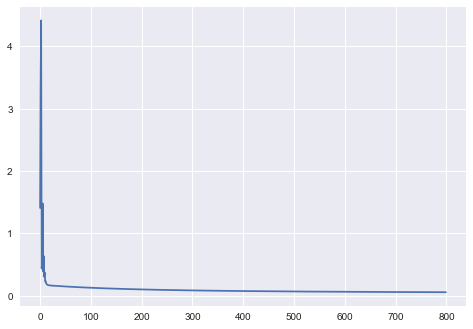

In [93]:
plt.plot(l)
plt.show()

### Visualising The Decision Surface

In [100]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0] :
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>= 0.5] = 1
        return labels

In [107]:
x1 = np.linspace(-12,2,10)
print(x1)

[-12.         -10.44444444  -8.88888889  -7.33333333  -5.77777778
  -4.22222222  -2.66666667  -1.11111111   0.44444444   2.        ]


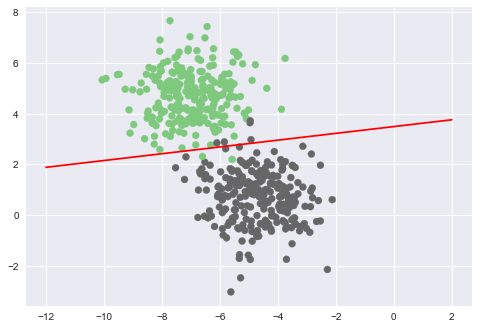

In [108]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
x2 = -(w[0] + w[1]*x1)/w[2]
plt.plot(x1,x2,c = 'red')
plt.show()

In [109]:
p = getPredictions(X,w)

In [111]:
## Training Accuracy
z = (p==Y)
print(sum(z)/Y.shape[0])

0.986
